### 1. IMPORTING THE LIBRARY FILES

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)


In [5]:
#importing the dataset

df=pd.read_csv("/Users/shwethasp/Downloads/test.csv")


### 2.EXPLORATORY DATA ANALYSIS

In [7]:
df.shape

(59909, 7)

In [8]:
# Check the DataFrame structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59909 non-null  int64 
 1   season     59909 non-null  int64 
 2   episode    59909 non-null  int64 
 3   scene      59909 non-null  int64 
 4   line_text  59909 non-null  object
 5   speaker    59909 non-null  object
 6   deleted    59909 non-null  bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB
None


In [9]:
# Filter the DataFrame for speakers with less than 3 words and where deleted is False
filtered_df = df[(df['speaker'].str.split().str.len() < 3) ]

# Sort the filtered DataFrame by the 'speaker' column in ascending order if desired
filtered_df = filtered_df.sort_values(by='speaker').reset_index(drop=True)

# Display the new filtered DataFrame
print(filtered_df)

df=filtered_df

          id  season  episode  scene  \
0      27451       5       15     19   
1      27448       5       15     19   
2      27453       5       15     19   
3      27445       5       15     19   
4      27442       5       15     19   
...      ...     ...      ...    ...   
59485  57599       9       17     24   
59486  34268       6       11     22   
59487  44567       7       21     28   
59488  18239       4        3     19   
59489   3308       2        4     36   

                                               line_text speaker  deleted  
0                        No, what are you talking about?    A.J.    False  
1                                             Excuse me?    A.J.    False  
2                                   Does what feel good?    A.J.    False  
3                              It's pretty serious, yes.    A.J.    False  
4             Yeah. Why, are you interested? [all laugh]    A.J.    False  
...                                                  ...     ..

### CLEANING THE DATASET

1. Convert the speaker column to lower case and remove all the special characters except apostrophes
2. Split the speaker into first and last name
3. Create two list with first_name and last_name. Then replace full_name if the first_name matched with list with full_name
4. Apply the same to all the cells

In [10]:
# Split the 'speaker' column into two new columns: 'first_name' and 'second_name'
df[['first_name', 'second_name']] = df['speaker'].str.split(' ', n=1, expand=True)

# Create lists from the columns
first_names = df['first_name'].tolist()
second_names = df['second_name'].tolist()

# Check if any second names are present in the corresponding first names
for i in range(len(second_names)):
    # Ensure both names are not None and are strings
    first_name = first_names[i] if isinstance(first_names[i], str) else ''
    second_name = second_names[i] if isinstance(second_names[i], str) else ''
    
    if second_name and second_name in first_name:
        second_names[i] = ''  # Set the second name to empty if it appears in the first name

# Update the DataFrame with the modified second names
df['second_name'] = second_names

# Combine first_name and second_name into a new column called full_name
df['full_name'] = df.apply(
    lambda row: row['first_name'] if pd.isna(row['second_name']) or row['second_name'] == '' else row['first_name'] + ' ' + row['second_name'],
    axis=1
)

# Get unique full names and sort them in ascending order
unique_full_names = df['full_name'].dropna().unique()
unique_full_names_sorted = sorted(unique_full_names)

# Display the unique full names in ascending order
print("Unique full names in ascending order:")
for name in unique_full_names_sorted:
    print(name)

Unique full names in ascending order:
A.J.
AJ
Aaron Rodgers
Abby
Actor
Actress
Alan
Albiny
Alex
Alice
All
All Girls
Alonzo
Alyssa
Amanda
Amy
Andy
Andy/Oscar
Andy/Pam
Andy/Stanley
Angel
Angela
Angela/Pam
Angels
Anglea
Announcer
Another guy
Archivist
Artist
Astrid
Athlead Coworker
Athlead Employee
Attendant
Audience
Aunt Shirley
Ballerinas
Bar Manager
Barbara
Barbara Allen
Bartender
Bass Player
Ben
Ben Franklin
Bert
Beth
Bill
Bill Cress
Bill Hader
Billy
Billy Merchant
Billy's Girlfriend
Blogger
Blogger 2
Blonde
Blood Girl
Boat Guy
Bob
Bob Vance
Bob's Secretary
Bookstore employee
Boom Box
Both
Bouncer
Brad
Brandon
Brenda
Brian
Broccoli Rob
Bruce
Bus driver
Business partner
Businessman #1
Businessman #2
Businessman #3
Buyer
CPR Trainer
CPR trainer
Calvin
Camera Crew
CameraMan
Cameraman
Cameron
Captain Jack
Carla
Carla Fern
Carol
Carol Stills
Carrol
Carroll
Casey
Casey Dean
Cathy
Cece
Chad Lite
Chares
Charles
Check-in guy
Chef
Chelsea
Chet
Child
Children
Chili's Employee
Christian
Christian

In [11]:
# Create list1 for full names with two words (first_name and second_name)
list1 = df[df['full_name'].str.split().str.len() == 2]['full_name'].tolist()

# Create list2 for full names with one word (first_name only)
list2 = df[df['full_name'].str.split().str.len() == 1]['full_name'].tolist()

# Loop through rows in the DataFrame
for i, row in df.iterrows():
    # Check if the first_name exists in list2 and if it matches with full_name in list1
    if row['full_name'] in list2 and row['first_name'] in list1:
        # Find the corresponding full_name from list1 based on the first_name match
        match_full_name = [name for name in list1 if name.startswith(row['first_name'])]
        
        # If a match is found in list1, replace the full_name in list2
        if match_full_name:
            df.at[i, 'full_name'] = match_full_name[0]

In [12]:
# Step 1: Create a dictionary mapping first names to full names
name_mapping = {
    'bill': 'bill cress',
    'angela': 'angelapam',  
    'barbara': 'barbara allen' ,
    'girls':'girl',
    'billy':'billy merchant',
    'christian':'christian slater',
    'dacvid walalce':'dacvid wallace'
}

# Step 2: Update full_name based on the name_mapping
for i, row in df.iterrows():
    # Check if the first name is in the mapping dictionary
    first_name = row['first_name'].lower()  # Convert to lowercase for case-insensitive matching
    if first_name in name_mapping:
        # Update the full_name with the corresponding full name from the mapping
        df.at[i, 'full_name'] = name_mapping[first_name]



In [13]:
# Create a list of unwanted terms
unwanted_terms = ['actor', 'actress', 'all', 'another guy', 'both', 'children','d','guy','mr','girls','all girls','camera crew']  


# Step 1: Remove rows where full_name contains any unwanted terms
df = df[~df['full_name'].str.lower().isin(unwanted_terms)]

# Create list1 for full names with two words (first_name and second_name)
list1 = df[df['full_name'].str.split().str.len() == 2]['full_name'].tolist()

# Create list2 for full names with one word (first_name only)
list2 = df[df['full_name'].str.split().str.len() == 1]['full_name'].tolist()

# Loop through rows in the DataFrame
for i, row in df.iterrows():
    # Check if the first_name exists in list2 and if it matches with full_name in list1
    if row['full_name'] in list2 and row['first_name'] in list1:
        # Find the corresponding full_name from list1 based on the first_name match
        match_full_name = [name for name in list1 if name.startswith(row['first_name'])]
        
        # If a match is found in list1, replace the full_name in list2
        if match_full_name:
            df.at[i, 'full_name'] = match_full_name[0]

# Display the modified DataFrame
print(df[['first_name', 'full_name']])

      first_name full_name
0           A.J.      A.J.
1           A.J.      A.J.
2           A.J.      A.J.
3           A.J.      A.J.
4           A.J.      A.J.
...          ...       ...
59485       Zeke      Zeke
59486       Zion      Zion
59487        abe       abe
59488      sAndy     sAndy
59489       song      song

[59377 rows x 2 columns]


In [93]:
# Get unique full names, sort them in ascending order, and convert to a list
unique_full_names_sorted = sorted(df['full_name'].dropna().unique())

# Display the unique full names
print("Unique full names in ascending order:")
for name in unique_full_names_sorted:
    print(name)


Unique full names in ascending order:
aaron rodgers
abby
abe
aj
alan
albiny
alex
alice
alonzo
alyssa
amanda
amy
andy
andyoscar
andypam
andystanley
angel
angelapam
angels
anglea
announcer
archivist
artist
astrid
athlead coworker
athlead employee
attendant
audience
aunt shirley
ballerinas
bar manager
barbara allen
bartender
bass player
ben
ben franklin
bert
beth
bill cress
billy merchant
billy's girlfriend
blogger
blogger2
blonde
blood girl
boat guy
bob
bob vance
bob's secretary
bookstore employee
boom box
bouncer
brad
brandon
brenda
brian
broccoli rob
bruce
bus driver
business partner
businessman1
businessman2
businessman3
buyer
calvin
cameraman
cameron
captain jack
carla
carla fern
carol
carol stills
carrol
carroll
casey
casey dean
cathy
cece
chad lite
chares
charles
checkin guy
chef
chelsea
chet
child
chili's employee
christian slater
church congregation
cindy
clark
clay aiken
cleaning lady
client
colin
college student
computron
concierge
concierge marie
cookie monster
council
cousin 

In [16]:
# Count unique names in the full_name column
unique_name_count = df['full_name'].nunique()

df['full_name'].unique()

# Display the count of unique full names
print("Count of unique full names:", unique_name_count)


Count of unique full names: 597


In [17]:
df.shape

(59377, 10)

In [46]:
#Number of episodes where the character does not have a line, for each character

# Step 1: Get all unique full names
full_names = df['full_name'].unique()

# Step 2: Initialize a dictionary to store counts
episodes_without_lines = {name: 0 for name in full_names}

# Step 3: Get all unique episodes (combining season and episode for uniqueness)
unique_episodes = df[['season', 'episode']].drop_duplicates()

# Step 4: Count episodes without lines for each full_name
for index, row in unique_episodes.iterrows():
    season = row['season']
    episode = row['episode']
    
    # Get full names who spoke in this season and episode
    full_names_in_episode = df[(df['season'] == season) & (df['episode'] == episode)]['full_name'].unique()
    
    for name in full_names:
        if name not in full_names_in_episode:
            episodes_without_lines[name] += 1

# Convert the result to a DataFrame for better visualization
episodes_without_lines_df = pd.DataFrame(list(episodes_without_lines.items()), columns=['full_name', 'episodes_without_lines'])

# Sort the DataFrame by number of episodes in descending order
episodes_without_lines_df = episodes_without_lines_df.sort_values(by='episodes_without_lines', ascending=True)

# Display the results
print(episodes_without_lines_df)

            full_name  episodes_without_lines
154            dwight                       0
235               jim                       1
387               pam                       4
268             kevin                       6
16          angelapam                      11
..                ...                     ...
58   business partner                     185
265       kelly's mom                     185
264    kelly's father                     185
276       larry myers                     185
577             sandy                     185

[578 rows x 2 columns]


### QUESTION

#### Identify the top 5 characters who have dialogues in every season, and determine whether their number of dialogues increased each season.

In [18]:
# Assuming unique_season contains the unique season values from the dataset
unique_season = df['season'].unique().tolist()
unique_season

[5, 7, 9, 2, 3, 6, 8, 4, 1]

In [22]:
# Group by 'full_name' and 'season' to count the 'line_text' occurrences
df_season_line_count = df.groupby(['full_name', 'season'])['line_text'].count().reset_index()

# Pivot the table to get 'season_1', 'season_2', etc., as columns
df_pivoted = df_season_line_count.pivot_table(index='full_name', columns='season', values='line_text', aggfunc='sum', fill_value=0)

# Rename columns to match the format 'season_X'
df_pivoted.columns = [f'season_{col}' for col in df_pivoted.columns]

# Group by 'full_name' and find unique 'season' for each
df_grouped = df.groupby('full_name')['season'].agg(lambda x: list(x.unique())).reset_index()
df_grouped.rename(columns={'season': 'unique_season'}, inplace=True)

# Add a column to show the total number of unique seasons for each 'full_name'
df_grouped['unique_season_count'] = df_grouped['unique_season'].apply(len)

# Filter to show only 'full_name' with all unique seasons
df_filtered = df_grouped[df_grouped['unique_season'].apply(lambda x: set(unique_season).issubset(set(x)))]

# Select only the 'full_name' and 'unique_season_count' columns
df_result = df_filtered[['full_name', 'unique_season_count']]

# Reset index for the result DataFrame
df_result = df_result.reset_index(drop=True)

# Merge df_result with df_pivoted to filter only full_name from df_result
df_final = df_pivoted.merge(df_result[['full_name']], on='full_name', how='inner')

# Add a column for the total line_text count across all seasons for each full_name
df_final['total_line_count'] = df_final.select_dtypes(include='number').sum(axis=1)

# Sort the DataFrame by the total line count in descending order
df_final_sorted = df_final.sort_values(by='total_line_count', ascending=False)

# Drop the total_line_count column after sorting (optional)
df_final_sorted = df_final_sorted.drop(columns=['total_line_count'])




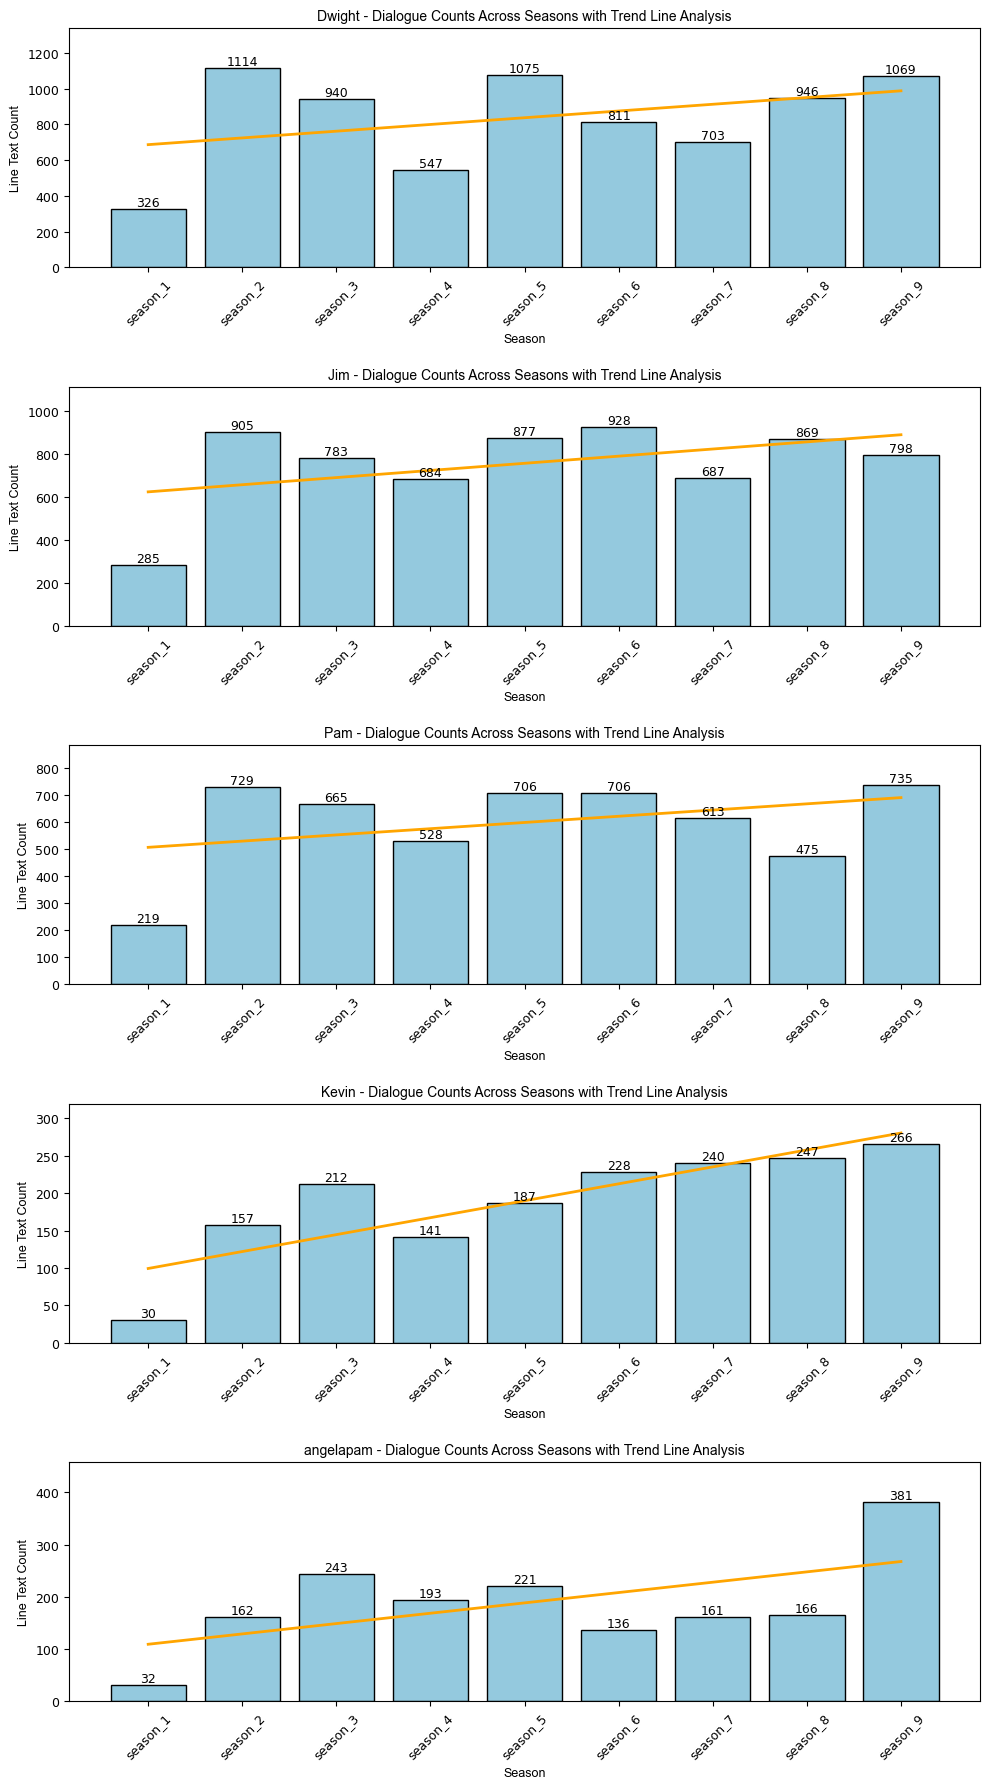

In [26]:
# Create subplots (5 rows, 1 column)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 18))
font_title = {'family': 'Arial', 'weight': 'normal', 'size': 14}  # Font for title
font_labels = {'family': 'Arial', 'weight': 'normal', 'size': 10}  # Font for axis labels

# Iterate through the top 5 full_names and create individual plots for each
for i, full_name in enumerate(top_5_full_names):
    # Select the row corresponding to the full_name (exclude the 'total_line_count' column)
    row = df_final.loc[df_final['full_name'] == full_name].drop(columns=['total_line_count'])
    
    # Get season numbers and line_text counts
    seasons = row.columns[1:].astype(str)  # Exclude the 'full_name' column for the seasons
    line_counts = row.iloc[0, 1:].values  # Extract line counts
    
    # Ensure line_counts is numeric (convert non-numeric to NaN and then handle NaN values)
    line_counts = pd.to_numeric(line_counts, errors='coerce')  # Convert to numeric, coercing errors to NaN
    line_counts = np.nan_to_num(line_counts)  # Replace NaN with 0 (or you can replace with any other value)

    # Create a seaborn barplot
    sns.barplot(x=seasons, y=line_counts, ax=axes[i], color='skyblue', edgecolor='black')

    # Add a trend line (regression line) without the confidence interval (shaded area)
    sns.regplot(x=np.arange(len(seasons)), y=line_counts, ax=axes[i], scatter=False, color='orange', line_kws={'color': 'orange', 'linewidth': 2}, ci=None)

    # Show data points as text labels on the bar plot
    for x, y in zip(seasons, line_counts):
        axes[i].text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=9)

    # Set the title and labels with professional font and reduced font size
    axes[i].set_title(f'{full_name} - Dialogue Counts Across Seasons with Trend Line Analysis', fontsize=10, fontdict=font_title)
    axes[i].set_xlabel('Season', fontsize=9, fontdict=font_labels)
    axes[i].set_ylabel('Line Text Count', fontsize=9, fontdict=font_labels)

    # Set the y-axis limits with a margin above the maximum value
    max_y = max(line_counts)
    axes[i].set_ylim(0, max_y + max_y * 0.2)

    # Increase spacing between the bars
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)  # Rotate x-axis labels for better fit
    axes[i].tick_params(axis='y', labelsize=9)

# Adjust layout to avoid overlap and improve spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


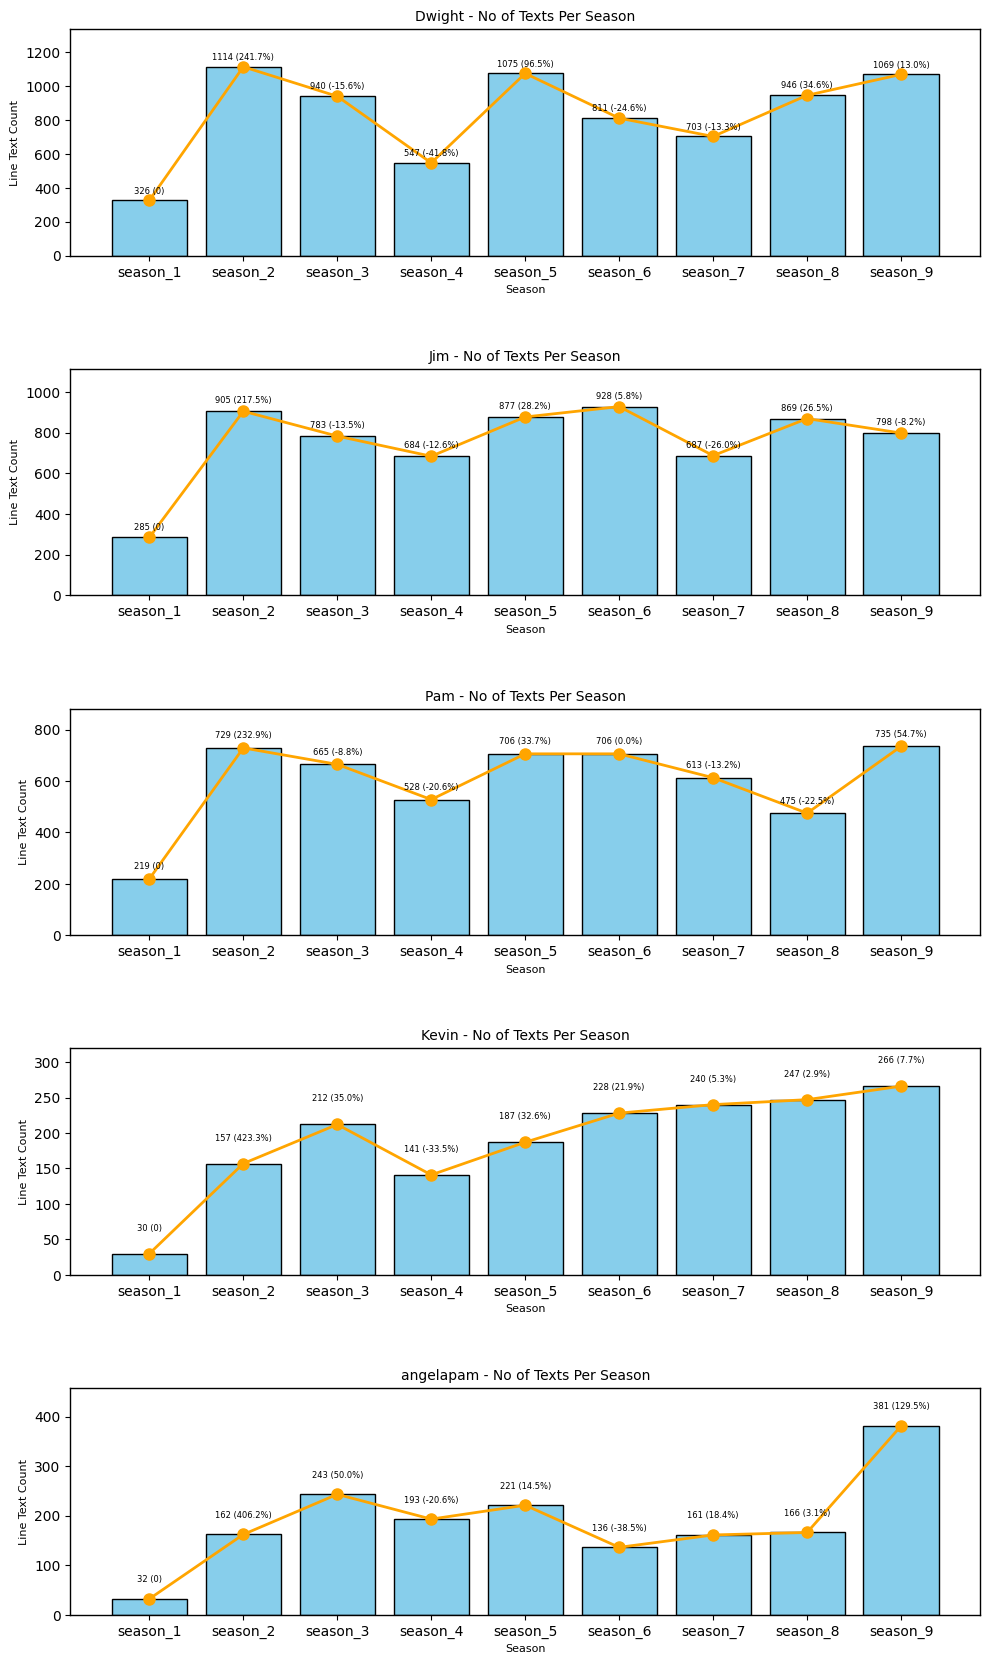

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top 5 full_names based on the total line count across all seasons
top_5_full_names = df_final.sort_values(by='total_line_count', ascending=False).head(5)['full_name']

# Create subplots (5 rows, 1 column)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 18))

# Iterate through the top 5 full_names and create individual plots for each
for i, full_name in enumerate(top_5_full_names):
    # Select the row corresponding to the full_name (exclude the 'total_line_count' column)
    row = df_final.loc[df_final['full_name'] == full_name].drop(columns=['total_line_count'])
    
    # Get season numbers and line_text counts
    seasons = row.columns[1:].astype(str)
    line_counts = row.iloc[0, 1:].values
    
    # Plot the bar chart for line_text count by season with a border
    bars = axes[i].bar(seasons, line_counts, color='skyblue', edgecolor='black')

    # Plot the trend line with circular data points
    axes[i].plot(seasons, line_counts, color='orange', marker='o', markersize=8, linestyle='-', linewidth=2)

    # Calculate and annotate percentage change between consecutive seasons along the trend line
    percentage_changes = []
    for j in range(1, len(line_counts)):
        change_percentage = ((line_counts[j] - line_counts[j-1]) / line_counts[j-1]) * 100 if line_counts[j-1] != 0 else 0
        percentage_changes.append(f'{change_percentage:.1f}%')

    # Add data labels (value of line_text) along the trend line with percentage in brackets
    for j, season in enumerate(seasons):
        yval = line_counts[j]
        change_percentage = percentage_changes[j-1] if j > 0 else 0  # previous season's percentage change
        axes[i].text(season, yval + 30, f'{int(yval)} ({change_percentage})', ha='center', va='bottom', fontsize=6)

    # Set the title and labels with specified font sizes
    axes[i].set_title(f'{full_name} - No of Texts Per Season', fontsize=10)
    axes[i].set_xlabel('Season', fontsize=8)
    axes[i].set_ylabel('Line Text Count', fontsize=8)
    
    # Set the y-axis limits with some margin to fit the values
    max_y = max(line_counts)
    axes[i].set_ylim(0, max_y + max_y * 0.2)  # Increase y-axis range by 20% above the maximum value

    # Add a border around the chart area (axes)
    for spine in axes[i].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

# Adjust the layout to avoid overlap between subplots, x-axis labels, and the graph itself
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.1)  # Add space between subplots and the bottom of the figure for the y-axis labels

# Show the plot
plt.show()
